# Pandas Manual
*Vi forsøker å oppsummere bruk av pandas i manualformat*

*Trykk: View->Left Sidebar->Show Table of Contents*

In [2]:
import pandas as pd
import numpy as np

## Pandas Series
* En pandas serie inneholder «1-dimensjonal» data -- altså en slags liste
* Denne dataseriene har typisk:
  * Et navn (Hvilken data er dette?)
  * En indeks (unike etiketter for hvert datapunkt (feks en «liste» av tidspunkt, datoer, områder, osv)
  * Verdier («values») -- de faktiske datapunktene

### Lage pandas Series
Vi kan lage en pandas `Series` slik:

`s = pd.Series(data=None, index=None, dtype=None, name=None, copy=None)`
| Metode                         | Eksempel                                       | Beskrivelse                                                                                     |
|---------------------------------|------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Fra liste**                   | `pd.Series([1, 2, 3])`                        | Oppretter en Series fra en Python-liste. Indeksen vil automatisk være heltall fra 0.             |
| **Fra NumPy-array**             | `pd.Series(np.array([1, 2, 3]))`              | Oppretter en Series fra en NumPy-array.                                                          |
| **Fra dictionary**                  | `pd.Series({'a': 1, 'b': 2, 'c': 3})`         | Oppretter en Series fra en dictionary der nøkler blir indeksen og verdier blir dataene.              |
| **Med egendefinert indeks**     | `pd.Series([1, 2, 3], index=['a', 'b', 'c'])` | Oppretter en Series fra en liste med en egendefinert indeks i stedet for standard heltallindeks. |
| **Fra én verdi**                | `pd.Series(5, index=['a', 'b', 'c'])`         | Oppretter en Series der samme verdi gjentas for hver indeks.                                     |
| **Fra Pandas DataFrame-kolonne**| `pd.Series(df['kolonne'])`                    | Oppretter en Series ved å velge en kolonne fra en DataFrame.                                     |
| **Fra annen Series**            | `pd.Series(existing_series)`                  | Oppretter en ny Series basert på en eksisterende Series.                                         |


In [25]:
# Eksempel: numpy array

vekt = np.array([3.5, 4.5, 5.6, 6.5, 7.2, 7.9, 8.5, 9.0, 9.3, 9.5, 9.7, 9.8]) #Vekt (kg)
alder = range(12) #Alder, måneder 0 til 11
vekt_ole = pd.Series(vekt, index=alder, name="Vekt, Ole", copy=True, dtype="float32")
vekt_ole

0     3.5
1     4.5
2     5.6
3     6.5
4     7.2
5     7.9
6     8.5
7     9.0
8     9.3
9     9.5
10    9.7
11    9.8
Name: Vekt, Ole, dtype: float32

In [6]:
# Eksempel, fra dictionary
kommunal_statistikk_fjordvik = {
    "navn": "Fjordvik",
    "befolkning": 32000,
    "bnp_per_innbygger": 45000,  # i NOK
    "arbeidsledighet": 3.2,  # prosent
    "gjennomsnittsinntekt": 520000,  # i NOK per år
    "fattigdomsrate": 7.5,  # prosent
    "sysselsettingsrate": 67.8,  # prosent
    "primærnæring": 25,  # prosentandel fra primærnæring
    "sekundærnæring": 37,  # prosentandel fra sekundærnæring
    "tertiærnæring": 38,  # prosentandel fra tertiærnæring
    "budsjett_inntekter": 950000000,  # i NOK
    "budsjett_utgifter": 920000000,  # i NOK
    "budsjett_underskudd": 30000000,  # i NOK
    "offentlig_investering_utdanning": 150000000,  # i NOK
    "offentlig_investering_infrastruktur": 250000000,  # i NOK
    "offentlig_investering_helse": 200000000,  # i NOK
    "median_boligpris": 3200000,  # i NOK
    "bedriftsvekst": 2.1,  # prosent
}
fjordvik_stats = pd.Series(kommunal_statistikk_fjordvik, name="Kommunal statistikk")
fjordvik_stats

navn                                    Fjordvik
befolkning                                 32000
bnp_per_innbygger                          45000
arbeidsledighet                              3.2
gjennomsnittsinntekt                      520000
fattigdomsrate                               7.5
sysselsettingsrate                          67.8
primærnæring                                  25
sekundærnæring                                37
tertiærnæring                                 38
budsjett_inntekter                     950000000
budsjett_utgifter                      920000000
budsjett_underskudd                     30000000
offentlig_investering_utdanning        150000000
offentlig_investering_infrastruktur    250000000
offentlig_investering_helse            200000000
median_boligpris                         3200000
bedriftsvekst                                2.1
Name: Kommunal statistikk, dtype: object

In [8]:
#Dersom vi tar i bruk indeks=[...] nå, velger vi ut datapunkter
#Dette er fordi indeksen/etikettene allerede er definert i dataen
fjordvik_stats2 = pd.Series(kommunal_statistikk_fjordvik, index=["navn", "befolkning", "gjennomsnittsinntekt"], name="Kommunal statistikk")
fjordvik_stats2

navn                    Fjordvik
befolkning                 32000
gjennomsnittsinntekt      520000
Name: Kommunal statistikk, dtype: object

### Datatyper til Series (og dataframes)
* Feltet `dtype`angir datatypen til dataen
* Datatypen forteller hvordan dataen skal lagres på maskinen
  

| **Type**       | **Name**    | **Description**                                       |
|----------------|-------------|-------------------------------------------------------|
| Integer        | `int8`      | Integer (-128 to 127)                                 |
| Integer        | `int16`     | Integer (-32,768 to 32,767)                           |
| Integer        | `int32`     | Integer (-2,147,483,648 to 2,147,483,647)             |
| Integer        | `int64`     | Integer (-9,223,372,036,854,775,808 to 9,223,372,036,854,775,807) |
| Unsigned Int   | `uint8`     | Unsigned integer (0 to 255)                           |
| Unsigned Int   | `uint16`    | Unsigned integer (0 to 65,535)                        |
| Unsigned Int   | `uint32`    | Unsigned integer (0 to 4,294,967,295)                 |
| Unsigned Int   | `uint64`    | Unsigned integer (0 to 18,446,744,073,709,551,615)    |
| Floating Point | `float16`   | Half precision floating point                         |
| Floating Point | `float32`   | Single precision floating point                       |
| Floating Point | `float64`   | Double precision floating point                       |
| Complex Number | `complex64` | Complex number (real and imaginary as `float32`)      |
| Complex Number | `complex128`| Complex number (real and imaginary as `float64`)      |
| Boolean        | `bool_`     | Boolean (True or False)                               |
| String         | `string_`   | Fixed-size string data                                |
| Unicode String | `unicode_`  | Fixed-size Unicode string data                        |


### Series atributter

Dataseriene vi lager har flere *atributter*

| **Attributt**      | **Beskrivelse**                                                                  |
|--------------------|----------------------------------------------------------------------------------|
| `index`            | Indeksen (labels) for Series.                                                    |
| `values`           | Verdiene (data) i Series som en NumPy-array.                                     |
| `name`             | Navnet på Series.                                                                |
| `dtype`            | Datatypen for verdiene i Series.                                                 |
| `size`             | Antall elementer i Series.                                                       |
| `shape`            | Dimensjonaliteten til Series (alltid en enkelt dimensjon).                       |
| `empty`            | Returnerer `True` hvis Series er tom (dvs. ikke har noen elementer).              |
| `nbytes`           | Det totale antallet bytes som forbrukes av elementene i Series.                  |
| `hasnans`          | Returnerer `True` hvis det finnes noen `NaN`-verdier i Series.                   |
| `is_unique`        | Returnerer `True` hvis alle verdiene i Series er unike.                          |
| `is_monotonic`     | Returnerer `True` hvis Series er sortert i stigende rekkefølge.                  |
| `str`              | Gir tilgang til strengmetoder (hvis Series inneholder strenger).                 |
| `dt`               | Gir tilgang til datetime-metoder (hvis Series inneholder datetime-objekter).     |


Noen av disse attributtene kan vi endre direkte:
| Attributt        | Kan Endres Direkte     | Hvordan Endre                                                |
|------------------|------------------------|--------------------------------------------------------------|
| `index`          | Ja                     | Tilordne en ny indeks: `s.index = ['a', 'b', 'c']`           |
| `name`           | Ja                     | Tilordne et nytt navn: `s.name = "Nytt Navn"`                |
| `dtype`          | Ja (indirekte)          | Bruk `astype()` for å "caste": `s = s.astype('float64')`       |
| `values`         | Ja (men ikke anbefalt)  | Endre verdier direkte (risikabelt): `s.values[0] = 10`       |
| Andre            | Nei                     | Skrivebeskyttede attributter, kan ikke endres direkte        |


In [26]:
#Eks
vekt_ole

0     3.5
1     4.5
2     5.6
3     6.5
4     7.2
5     7.9
6     8.5
7     9.0
8     9.3
9     9.5
10    9.7
11    9.8
Name: Vekt, Ole, dtype: float32

In [27]:
ny_index = [f"{mnd} måneder" for mnd in vekt_ole.index]
vekt_ole.index = ny_index
vekt_ole =vekt_ole.astype('float16', copy=True)
vekt_ole.name = "Oles vekt per måned"
vekt_ole

0 måneder     3.500000
1 måneder     4.500000
2 måneder     5.601562
3 måneder     6.500000
4 måneder     7.199219
5 måneder     7.898438
6 måneder     8.500000
7 måneder     9.000000
8 måneder     9.296875
9 måneder     9.500000
10 måneder    9.703125
11 måneder    9.796875
Name: Oles vekt per måned, dtype: float16

### Series Metoder
En pandas dataserie har mange nyttige innebygde metoder som gjør ting med dataen:

| **Metode**            | **Beskrivelse**                                                                  |
|-----------------------|----------------------------------------------------------------------------------|
| `head(n)`             | Returnerer de første `n` elementene i Series (standard er 5).                     |
| `tail(n)`             | Returnerer de siste `n` elementene i Series (standard er 5).                      |
| `unique()`            | Returnerer unike verdier i Series.                                                |
| `value_counts()`      | Returnerer antall forekomster av unike verdier i Series.                          |
| `describe()`          | Genererer beskrivende statistikk som antall, gjennomsnitt, std, min og maks.      |
| `sum()`               | Returnerer summen av elementene i Series.                                         |
| `mean()`              | Returnerer gjennomsnittet av elementene i Series.                                 |
| `median()`            | Returnerer medianen av elementene i Series.                                       |
| `min()`               | Returnerer minimumsverdien i Series.                                              |
| `max()`               | Returnerer maksimumsverdien i Series.                                             |
| `std()`               | Returnerer standardavviket til Series.                                            |
| `sort_values()`       | Sorterer Series etter verdiene.                                                   |
| `sort_index()`        | Sorterer Series etter indeksen.                                                   |
| `apply(func)`         | Anvender en funksjon element for element på Series.                               |
| `map(func)`           | Mapper verdier i Series ved hjelp av funksjon eller dictionary.                       |
| `dropna()`            | Fjerner `NaN`-verdier fra Series.                                                 |
| `fillna(value)`       | Fyller inn `NaN`-verdier med en spesifisert verdi.                                |
| `astype(dtype)`       | Endrer datatypen til Series til spesifisert datatype.                             |
| `clip(lower, upper)`  | Begrenser verdier til et spesifisert område (nedre og øvre grenser).              |
| `between(left, right)`| Returnerer True for verdier mellom spesifiserte grenser.                          |
| `shift(periods)`      | Skifter verdiene med et spesifisert antall perioder.                             |
| `cumsum()`            | Returnerer den kumulative summen av elementene i Series.                          |
| `cumprod()`           | Returnerer det kumulative produktet av elementene i Series.                       |
| `rolling(window)`     | Gir glidende beregninger med et gitt vindu                                          |
| `expanding()`         | Gir ekspanderende beregninger (f.eks. kumulative beregninger).               |
| `resample(rule)`      | Resampler tidsseriedata i henhold til en spesifisert frekvens.                    |
| `plot()`              | Plotter dataen i Series ved hjelp av Matplotlib.                                  |


count    12.000000
mean      7.583333
std       2.140447
min       3.500000
25%       6.275000
50%       8.200000
75%       9.350000
max       9.800000
Name: Oles vekt per måned, dtype: float64

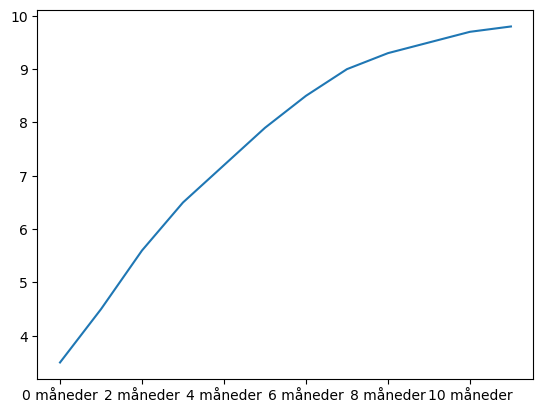

In [19]:
#Eks 
vekt_ole.plot()
vekt_ole.describe()

In [16]:
# Ved radbruk
kommunal_statistikk_kystvik = {
    "navn": "Kystvik",
    "befolkning": 45000,
    "bnp_per_innbygger": 55000,  # i NOK
    "arbeidsledighet": 4.1,  # prosent
    "gjennomsnittsinntekt": 610000,  # i NOK per år
    "fattigdomsrate": 6.3,  # prosent
    "sysselsettingsrate": 70.4,  # prosent
    "primærnæring": 18,  # prosentandel fra primærnæring
    "sekundærnæring": 30,  # prosentandel fra sekundærnæring
    "tertiærnæring": 52,  # prosentandel fra tertiærnæring
    "budsjett_inntekter": 1200000000,  # i NOK
    "budsjett_utgifter": 1150000000,  # i NOK
    "budsjett_underskudd": 50000000,  # i NOK
    "offentlig_investering_utdanning": 180000000,  # i NOK
    "offentlig_investering_infrastruktur": 300000000,  # i NOK
    "offentlig_investering_helse": 220000000,  # i NOK
    "median_boligpris": 3800000,  # i NOK
    "bedriftsvekst": 3.2,  # prosent
}

df = pd.DataFrame([kommunal_statistikk_fjordvik, kommunal_statistikk_kystvik])
df.index = df["navn"]
df.drop(columns=["navn"])

,befolkning,bnp_per_innbygger,arbeidsledighet,gjennomsnittsinntekt,fattigdomsrate,sysselsettingsrate,primærnæring,sekundærnæring,tertiærnæring,budsjett_inntekter,budsjett_utgifter,budsjett_underskudd,offentlig_investering_utdanning,offentlig_investering_infrastruktur,offentlig_investering_helse,median_boligpris,bedriftsvekst
navn,,,,,,,,,,,,,,,,,
Fjordvik,32000,45000,3.2,520000,7.5,67.8,25,37,38,950000000,920000000,30000000,150000000,250000000,200000000,3200000,2.1
Kystvik,45000,55000,4.1,610000,6.3,70.4,18,30,52,1200000000,1150000000,50000000,180000000,300000000,220000000,3800000,3.2
